# Manual Matching of a WEST ICRH Antenna on Plasma

This notebook calculates the charts used in the internal documentation for the IC Operators for the manual matching on plasma. 

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import skrf as rf

# WEST ICRH Antenna package
import sys; sys.path.append('..')
from west_ic_antenna import WestIcrhAntenna
#rf.stylely()

# Capacitance Diff vs Coupling Resitance
For a given RF frequency $f_0$ and phase setup, an antenna is generally first matched on vacuum conditions, leading to a couple of solution (C1, C2, C3, C4).

For the WEST preset frequencies, We create multiple plasma scenarios for low to high coupling cases and for each of them we determine the best matching point:

In [67]:
# WEST Antenna matched on vacuum condition in dipole (default) for a given frequency
f0_MHzs = [55.5] # [48, 53, 55.5, 57, 63]
delta_Cs = {}

for f0_MHz in tqdm(f0_MHzs):
    freq = rf.Frequency(f0_MHz, f0_MHz, npoints=1, unit='MHz')
    ant_vacuum = WestIcrhAntenna(frequency=freq)  # default is vacuum coupling
    Cs_vac = ant_vacuum.match_both_sides()
    
    Rcs = np.linspace(0.4, 1.7, num=10)
    Cs_plasmas = []
    
    for Rc in tqdm(Rcs):
        plasma = WestIcrhAntenna.interpolate_front_face(Rc, source='TOPICA-H-mode')
        ant_plasma = WestIcrhAntenna(frequency=freq, front_face=plasma)
        Cs_plasma = ant_plasma.match_both_sides()
        Cs_plasmas.append(Cs_plasma)
        
    delta_Cs[f0_MHz] = np.array(Cs_plasmas) - np.array(Cs_vac)

  0%|          | 0/1 [00:00<?, ?it/s]

Looking for individual solutions separately for 1st guess...
True solution #1: [50.008626   48.05845312]
Wrong solution (out of range capacitor) ! Re-doing...
False solution #1: [150. 150.]
True solution #1: [49.81199335 48.24698247]
Searching for the active match point solution...
Reducing search range to +/- 5pF around individual solutions
True solution #1: [50.64529282 48.80114839 50.13209651 48.98123303]


  0%|          | 0/10 [00:00<?, ?it/s]

Looking for individual solutions separately for 1st guess...
True solution #1: [52.01022046 46.62836192]
True solution #1: [51.65518792 46.79070957]
Searching for the active match point solution...
Reducing search range to +/- 5pF around individual solutions
True solution #1: [52.52977    47.10572717 52.28786916 47.27745642]
Looking for individual solutions separately for 1st guess...
Wrong solution (out of range capacitor) ! Re-doing...
False solution #1: [150. 150.]
Wrong solution (out of range capacitor) ! Re-doing...
False solution #1: [150. 150.]
Wrong solution (out of range capacitor) ! Re-doing...
False solution #1: [150. 150.]
Wrong solution (out of range capacitor) ! Re-doing...
False solution #1: [33.55344482 33.55344482]
Wrong solution (out of range capacitor) ! Re-doing...
False solution #1: [150. 150.]
Wrong solution (out of range capacitor) ! Re-doing...
False solution #1: [33.55354256 33.55354256]
Wrong solution (out of range capacitor) ! Re-doing...
False solution #1: [

  0%|          | 0/1 [00:00<?, ?it/s]

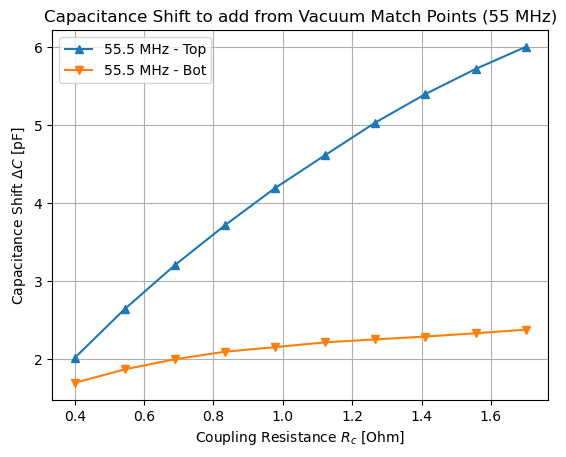

In [68]:
fig, ax = plt.subplots()
for f0_MHz in tqdm(f0_MHzs):
    ax.plot(Rcs, abs(delta_Cs[f0_MHz][:,0] + delta_Cs[f0_MHz][:,2])/2, marker='^', label=f'{f0_MHz} MHz - Top')
    ax.plot(Rcs, abs(delta_Cs[f0_MHz][:,1] + delta_Cs[f0_MHz][:,3])/2, marker='v', label=f'{f0_MHz} MHz - Bot')
ax.set_xlabel('Coupling Resistance $R_c$ [Ohm]')
ax.set_ylabel('Capacitance Shift $\Delta C$ [pF]')
ax.set_title('Capacitance Shift to add from Vacuum Match Points (55 MHz)')
ax.legend()
ax.grid(True)